# Advanced Data Science Capstone -- True vs. False News 
## Data Exploration

News of current events is a potent tool to direct the reader's attention.   In a fragmented media landscape with low publishing costs, false news can flourish distract or dilute the attention genuine issues receive.  It is obvious that attention is a finite mental resource and should be reserved for consuming truthful news versus fiction.

This project willl attempt to use a neural network to classify news stories as true or false.

Many projects have attempted to classify news stories as fake, bad, poor, or false.  We will explicitly limit ourselves to trying to identify false--as oppposed to true--news.  For example, the earth is flat or zombies are walking in the mall are demonstrably false.  We will not try to identify biased news.  As will be seen below, it is somewhat difficult to obtain a good dataset for this kind of news.

###  Our selection of datasets
We had a great difficulty in finding clean data that consisted of true and false stories, rather than opinionated, biased, or politically incorrect.  A great amount of the difficulty lies in the time and effort it takes to verify a news story as truthful, and most datasets rely on existing factchecking organizations.  (This difficulty points to the value of developing reliable Machine Learning models that can assist in the effort to identify false news.)

A number of the articles in the data science textual analysis literature describe having similar difficulties.  

As seen below, we can combine the datasets that should be useable.  We will use only those labelled True or False, and not use the Snopes ones labelled mixed, mostly true, or mostly false. 

This leaves us with 1129 useable articles, very evenly split between True and False topics. 

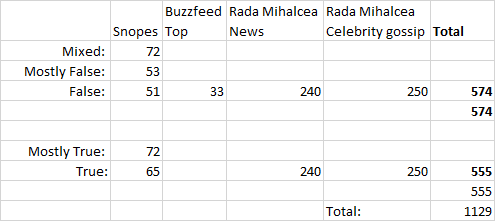

We examined the following possible data sources as candidates, and each is discussed: 

### Clément Bisaillon fake news dataset on Kaggle

Initially we considering using the single source of fake and real news dataset provided by Clément Bisaillon on Kaggle: Classifying the news
https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset

It claims to contain 20826 true stories and 17903 fake stories.  

#### Quality issues of the Bisaillon fake news dataset

Further examination of the fake news dataset revealed that it included biased and opinionated but not neccessarily false data, so we will not use the fake news from there.  The true dataset comes mostly from Reuters.  It might be useable in a future project, so we will keep it in mind.  These datasets are stored in our project's object storage as fake.csv and true.csv.

### Konspiratori.sk fake news dataset on Kaggle
A fake news dataset is available at: https://www.kaggle.com/mrisdal/fake-news  This contains text and metadata scraped from 244 websites tagged as "bullshit" by the BS Detector Chrome Extension by Daniel Sieradski.   The extension uses the opinions of an commission at Konspiratori.sk to designate articles as disreputable and aims to warn against false reports, conspiracy theories, hoaxes and hate speech and fascist ideologies.  The website states: 
```
We create a list of websites, with respect to which the members of our Review Board have doubts regarding their credibility and content quality.
  
The choice is yours whether you agree with our list and whether you use it. The list of websites was compiled by the Review Board members based on their professional assessment of these websites under clearly defined criteria. The Review Board members do this work on a voluntary basis since they are convinced that it is of value to the whole society.

  In our database you will find websites that meet, in the opinion of the Review Board, at least one of the following points:

1. A website contains materials of fraudulent or charlatan nature, such as miraculous healing, magic preparations and the like. The reviewed criterion is the conflict with objective, scientific knowledge, especially if such published information could lead to neglecting any necessary treatment or directly damage one’s health. This does not apply to traditional alternative treatment methods, promotion of healthy lifestyle or healing procedures based on nature etc.
    
2. A website contains misleading news, misinformation or false propaganda, i.e. any claims that are in conflict with the facts, e.g. photos or videos used in some misleading context, made up or severely misinterpreted events, etc. This does not apply to clearly presented opinion articles.
    
3. A website contains conspiracy theories and “delusions” that could have more serious political, economic or health consequences, stirring up passionate or hateful feelings without any critical assessment. This does not apply to curiosities, mysteries, or clearly marked speculations.
    
4. A website contains vulgarisms, calls to violence, extremist content, spreading false alarms, aggressive personal attacks, such as “eye-for-eye”, defamation of minorities, races, nationalities, religious groups, etc.
    
5. A website does not respect fundamental principles of journalistic ethics: it does not publish disclaimers (dementi), it leaves published and uncorrected any news that has been objectively proven untrue. A website does not have a clear owner or authors (protected sources of information and pseudonyms are respected), the site does not publish any responses by concerned parties, it grossly mixes the actual news with commentaries, repeatedly publishes shocking and false claims aimed at increasing visitor traffic, which it however quickly corrects, etc.

We shall gradually supplement and adapt these criteria based on our practical experience. Our primary goal is to protect the advertisers and their interests. The activities of the Review Board and the rules both follow this goal and we reserve the right to amend them as necessary.

Our database is purely of advisory nature and it is the responsibility of each advertiser to consider how to use it. It represents the opinion of the Review Board, which opinion we by no means present as a fact.
```

#### Quality issues of the Konspiratori.sk dataset
This dataset uses the article's website as a broad indication that the item is fake, and uses the website label to label all its articles, without examining the specific articles.  This is less specific than I would like to use as a training dataset.  While stories of a fraudulent or charlatan nature fit our definition of false, if we use all the stories found on these websites without further examination, we run the risk of contaminating our dataset and training material with true stories. 

We will not use this dataset.  Perhaps our completed model could be used to further check and classify the stories on these websites. 


### Rada Mihalcea dataset 
Rada Mihalcea (http://web.eecs.umich.edu/~mihalcea) has made a dataset available at http://web.eecs.umich.edu/~mihalcea/downloads.html#FakeNews  This has two sets of files, one about news and another about celebrity gossip.  News stories are found in six different topic areas: technology, education, business, sports, politics, and entertainment. They are sourced from mainstream news sites in the US such as ABCNews, CNN, USAToday, NewYorkTimes, FoxNews, Bloomberg, and CNET among others.  Each item in the group of real stories has a matching fake news story created using the Mechanical Turk Amazon service.  (This is a service that pays humans to do small piecework tasks.)   The fake news is useful and occasionally humorous, but the use of amateur writers betrays itself and is fairly easy for a reader to spot.  I'm not so sure it would present much of a challenge to a Machine Learning algorithm.

Here's an example of a real news item and its corresponding fake item:
#### Sample true story
> Laptop cabin ban 'ineffective' says IATA 

> The US and UK ban on laptops in cabin baggage on certain flights will not be an effective security measure  the International Air Transport Association has said. In a strongly worded speech  IATA chief executive Alexandre de Juniac said the ban also caused commercial distortions. The US ban was brought in as an anti-terrorist precaution. It covers inbound flights on airlines operating out of 10 airports in the Middle East  North Africa and Turkey. The British ban is similar but applies to different airlines. Airline passengers on 14 carriers are subject to the ban on inbound direct flights from Turkey  Lebanon  Jordan  Egypt  Tunisia and Saudi Arabia.

#### Sample fake story written using mechanical turk service

> Chief executive Alexandre de Juniac, of the International Air Transport Association has said that after surveying and polling passengers, everyone seems to be in agreement that the ban on laptops for in cabin use is awesome. Steve Harvey, who was appointed by the IATA, conducted the surveys and gathered the intel. Major air carriers such as Delta, Pan Am , and Southwest have seen  ticket sales sore to new heights. One spokesperson every said that people were much happier and reported a better flight experience and that passengers felt more communal about their experience. People really seem to respond to cookies and milk and good old time cartoons for the inflight movies. The cookies now served on flight for all international flights contain edibles and  the crew reports that most passengers eat, watch cartoons, and then sleep the majority of the flight.

#### Quality issues with the Rada Mihalcea dataset

The gossip set of stories is from mainstream news websites and entertainment magazine websites such as Entertainment Weekly, People Magazine, RadarOnline, and other tabloid and entertainment-oriented publications.  Again each real item is paired with a fake item that was manually verified using gossip-checking sites such as "GossipCop.com", and also cross-referenced with information from other entertainment news sources on the web.  

Since we have all of the needed text, and they are clearly labelled by their inclusion in the appropriate group, this dataset will be useful in training for truthful news and fake news.  

### FakeNewsNet dataset and scripts

The FakeNewsNet dataset found at  https://github.com/KaiDMML/FakeNewsNet (FNN) has four comma separated value (csv) files that have metadata (but not article text) of news stories classified as True and False by Politifact, and gossip stories classified as True and False by Gossipcop.com.  

Using some Python scripts and the URLs provided in the FNN csv's (see this project's repo) we downloaded the text from the true and false news stories.  Our hope was that these articles would be useful as they have been classified as true or false (rather than simply biased or opinionated) based on the actual article content. An older sample of data already downloaded is found at https://www.kaggle.com/antmarakis/fake-news-data

We found some data that meet our requirements at https://github.com/KaiDMML/FakeNewsNet.  Many of these stories have since been removed from the websites quoted.  Despite this, we were able to use a Python script to download a reasonable number of story text contents:
Fake political stories:  432
Real political stories:  624

#### Quality issues with the downloadFNN dataset
Unfortunately further examination indicates that in many cases the stories we downloaded at the URL provided has no relation to the original story, which has since been removed or replaced.  In some cases the text is that of the home page of the website, due to the original link being missing, and the website returning its home page instead.  Others may have been removed due to age or removed when they were called out as false on factchecking sites. Regardless, without the original text to use as training data, this dataset is not useful.

In other cases, stories are pointing to YouTube videos, and the text found is just an incomplete description of the video.

We will not use this dataset. 

### Three Misinfo datasets

The authors of the paper The Data Challenge in Misinformation Detection:Source Reputation vs. Content Veracity Big Data and quality data for fake news and misinformation detection (https://www.aclweb.org/anthology/W18-5502.pdf) provide several datasets. 

Contains a good discussion of the varieties of fake news and various modes of news bias through history. https://journals.sagepub.com/doi/full/10.1177/2053951719843310 A paper discussing below datasets: Misinfo dataset: https://github.com/sfu-discourse-lab/MisInfoText https://github.com/sfu-discourse-lab/Misinformation_detection

#### 1) Buzzfeed v02

Buzzfeed is rated mixed for Factual Reporting and to be in left/left-center on the political bias spectrum from http://mediabiasfactcheck.com

Asr FT, Taboada M (2019) | 1,380 news articles | 4-way (false, true, mixture, no factual content) | Collected using a pivot Buzzfeed dataset. Focused on the US election topic. https://github.com/sfu-discourse-lab/Misinformation_detection/blob/master/buzzfeed-v02-originalLabels.txt.zip These stories have been scraped from the web, but are skewed towards true stories 

The 1380 stories are labelled: Mixed: 170, Mostly False: 64, Mostly True: 1090, No factual content: 56). 
#### Quality Issues with Buzzfeed v02
These stories also seem to be poor training material as they have been adulterated by the scraping process that seemed to merge words together, especially words with apostrophes (ex: "I hope youdon mind my asking, butI curious" was recorded, rather than "I hope you don't mind my asking, but I'm curious.") 

Due to mangled text, and some reservations about Buzzfeed's fact checking methods, this doesn't seem to be a suitable dataset.

#### 2) Buzzfeed-top

Asr FT, Taboada M (2019) | 33 news articles | 4-way (false, true, mixture, no factual content) | Collected using a pivot Buzzfeed dataset. A variety of topics. https://github.com/sfu-discourse-lab/Misinformation_detection/blob/master/buzzfeed-top.csv.zip 

#### Quality Issues with  Buzzfeed top 50
This selection from the top 50 Buzzfeed false stories has 34 stories, all are obviously false, so they stay clear of any reservations we have about Buzzfeed's methods, and contains story text that does not suffer from the adulteration described above.  

This is a useable dataset, though it only has false stories.

#### 3) Snopes Checked dataset
Snopes was one of the first online fact checking websites.  It is rated high for Factual Reporting and to be in the center (Least Biased) of the political bias spectrum from http://mediabiasfactcheck.com

Asr FT, Taboada M (2019) | 312 news articles | 5-way (false to true) | Collected from Snopes. Balanced by label. A variety of topics. Includes stance information (articles for or against a labeled claim). https://github.com/sfu-discourse-lab/Misinformation_detection/blob/master/snopes_checked_v02.csv.zip 

#### Quality Issues with Snopes Checked dataset
This is a collection of stories, as labelled by Snopes.com, with full text that has not been adulterated by the scraping process. The counts are: Mixed: 72, Mostly False: 53, False: 51, Mostly True: 72, True 65.

This is a useable dataset.  We will use only the True and False groups, to be consistent with the Mihalcea dataset.

###  Fact Checking Websites
We looked at Politifact.com,  Snopes.com, and ClaimReview (https://www.claimreviewproject.com/) for the possibility of using their data or API to harvest newer data than found in the datasets above.  Politifact doesn't have an API, Snopes does not make theirs easily available, and the Claim Review Project provides opinions on general statements, rather than pointing out specific news stories that we could analyze in our model.  Facebook's factchecking organization has no publicly available API that I could find.  

### Quality of data
In reviewing each dataset above, we were able to remove some datasets due to poor quality (text mangling, unavailable story text).  We found datasets that had overly broad labelling, (Konspiratori.sk) or classifications that indicated bias and were not germane to our goal of separating truthful stories from fictional ones.

### Datasets we will use
We are left with the following files, which have the full text of the story and are reliably labelled as True and False.
Buzzfeed-top.csv (33 False stories)
Snopes_checked_v02.csv (51 False, 65 True stories)
Rada Mihalcea FakeNewsDataset (General news: 480 text files (240 true/240 false) and Celebrity news: 500 text files (250 true/250 false).


### Assessing feature quality 
For our needs, we only need a label of true and false and the full story text.  Each dataset has a number of additional attributes that may be useful, but which we won't really need to develop our model, such as  Original URL, title, date, and various other attributes left there by the original data collectors.  None of these are relevant.  (No correlation matrix is needed to determine this.)

### Data Distribution
The value distribution of our data sources is shown in the bar graph below. (Same as the table above.)

### Data Wrangling

Our github repo is at https://github.com/adamx97/Data-Science-Advanced-Capstone  

The three datasets: Mihalcea, Snopes, and Buzzfeed needed considerable wrangling to get them into the same format.  We assembled the data from these several files into a single set of files that share a single structure for processing in later stages.  We created an index field for each row that will allow us to trace the row back to the original dataset in case we need to check the flow of data.

Using the NewsDataUnifier.py script found in the repo, we combined the three useable datasets into a single dataframe that we will use going forward.



In [2]:
!pip install --upgrade pandas

Requirement already up-to-date: pandas in /opt/conda/envs/Python36/lib/python3.6/site-packages (1.1.0)


In [3]:
from ibm_botocore.client import Config
import ibm_boto3
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.show_versions()

In [5]:
# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials = {
    'IAM_SERVICE_ID': 'iam-ServiceId-32e8ee67-397c-4ff1-b69b-543172331f43',
    'IBM_API_KEY_ID': 'Rx4FR4JSAueCnnIsoevsgYgOsuh8LCXtbkFpFpC0EmVU',
    'ENDPOINT': 'https://s3-api.us-geo.objectstorage.service.networklayer.com',
    'IBM_AUTH_ENDPOINT': 'https://iam.cloud.ibm.com/oidc/token',
    'BUCKET': 'advanceddatasciencecapstone-donotdelete-pr-tqabpnbxebk8rm',
    'FILE': 'dfTrueFalseNews.pkl'
}

In [6]:
def download_file_cos(credentials,local_file_name,key):  
    cos = ibm_boto3.client(service_name='s3',
    ibm_api_key_id=credentials['IBM_API_KEY_ID'],
    ibm_service_instance_id=credentials['IAM_SERVICE_ID'],
    ibm_auth_endpoint=credentials['IBM_AUTH_ENDPOINT'],
    config=Config(signature_version='oauth'),
    endpoint_url=credentials['ENDPOINT'])
    try:
        res=cos.download_file(Bucket=credentials['BUCKET'],Key=key,Filename=local_file_name)
    except Exception as e:
        print(Exception, e)
    else:
        print('File Downloaded')

In [9]:
download_file_cos(credentials,'dfTrueFalseNews.pkl','dfTrueFalseNews.pkl')

File Downloaded


In [15]:
dfTrueFalseNews = pd.read_pickle('dfTrueFalseNews.pkl')
print (dfTrueFalseNews.columns, dfTrueFalseNews.shape)

Index(['text', 'source', 'truthvalue'], dtype='object') (1129, 3)


Text(0, 0.5, 'Article Counts')

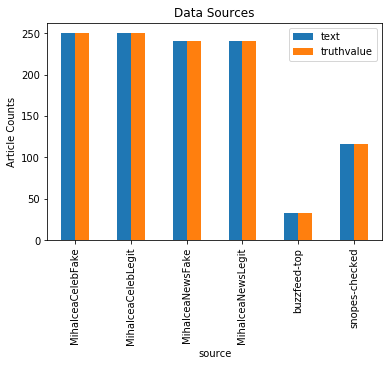

In [17]:
dfTrueFalseNews.groupby('source').count().plot(kind='bar')
plt.title("Data Sources")
plt.ylabel("Article Counts")


In [18]:
dfTrueFalseNews.head()

,text,source,truthvalue
biz01legit,Alex Jones Apologizes for Promoting 'Pizzagate...,MihalceaNewsLegit,1
biz02legit,Banks and Tech Firms Battle Over Something Aki...,MihalceaNewsLegit,1
biz03legit,California Upholds Auto Emissions StandardsSet...,MihalceaNewsLegit,1
biz04legit,Renegotiate Nafta? Mexicans Say Get On With It...,MihalceaNewsLegit,1
biz05legit,Snapchat 'will be bigger than TwitterYahoo an...,MihalceaNewsLegit,1


In [19]:
dfTrueFalseNews.tail()


,text,source,truthvalue
snopes_line_114,Page 1 Bottom Search Replies Previous Page Nex...,snopes-checked,0
snopes_line_116,Republican presidential front-runner Donald Tr...,snopes-checked,0
snopes_line_117,Former astronaut Buzz Aldrin has been release...,snopes-checked,0
snopes_line_118,>Officials say a pit bull mix deemed sociable ...,snopes-checked,0
snopes_line_311,Shocking images out of a classroom in Jacksonv...,snopes-checked,0
